In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/interim/combined-sunlight-duration-data.csv', index_col = 0)

In [3]:
def decimal_hr_calc(hrs, mins, secs):
    decimal_hrs = hrs + (mins / 60) + (secs / 3600)
    return round(decimal_hrs, 2)

In [4]:
decimal_hr_calc(10, 18, 52)

10.31

In [5]:
df['Daylength in decimal hours'] = [decimal_hr_calc(int(row.split(' ')[0][0:-1]),
                                                    int(row.split(' ')[1][:-1]),
                                                    int(row.split(' ')[2][:-1])) for row in df['Daylength']]

In [6]:
df

,Date,Sunrise,Sunset,Daylength,Daylength in decimal hours
0,11/17/2021,06:21:29 AM,04:41:21 PM,10h 19m 52s,10.33
1,11/18/2021,06:22:25 AM,04:40:52 PM,10h 18m 27s,10.31
2,11/19/2021,06:23:21 AM,04:40:25 PM,10h 17m 4s,10.28
3,11/20/2021,06:24:17 AM,04:39:59 PM,10h 15m 42s,10.26
4,11/21/2021,06:25:12 AM,04:39:35 PM,10h 14m 23s,10.24
...,...,...,...,...,...
405,12/27/2022,06:50:05 AM,04:45:28 PM,9h 55m 23s,9.92
406,12/28/2022,06:50:23 AM,04:46:09 PM,9h 55m 46s,9.93
407,12/29/2022,06:50:39 AM,04:46:50 PM,9h 56m 11s,9.94
408,12/30/2022,06:50:54 AM,04:47:33 PM,9h 56m 39s,9.94


In [7]:
df['Sunrise'] = pd.to_datetime(df['Date'] + ' ' + df['Sunrise'])
df['Sunset'] = pd.to_datetime(df['Date'] + ' ' + df['Sunset'])

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [8]:
sunlight_df = df.reset_index()[['Date', 'Daylength in decimal hours']]

sunlight_df

,Date,Daylength in decimal hours
0,2021-11-17,10.33
1,2021-11-18,10.31
2,2021-11-19,10.28
3,2021-11-20,10.26
4,2021-11-21,10.24
...,...,...
405,2022-12-27,9.92
406,2022-12-28,9.93
407,2022-12-29,9.94
408,2022-12-30,9.94


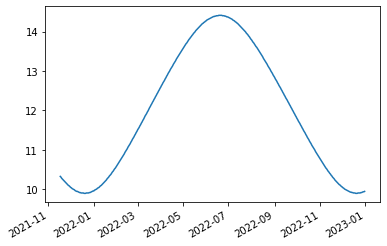

In [9]:
sunlight_df.set_index('Date', inplace = True)
plt.plot(sunlight_df)
plt.gcf().autofmt_xdate()
plt.show()

In [10]:
df.loc['2022-11-4']

Sunrise                       2022-11-04 07:09:08
Sunset                        2022-11-04 17:50:24
Daylength                             10h 41m 16s
Daylength in decimal hours                  10.69
Name: 2022-11-04 00:00:00, dtype: object

In [11]:
spot_check_11_4_2022 = pd.read_csv('https://gist.githubusercontent.com/nickmccarty/06d8a3bffa6c5511261ea0213faa06b3/raw/934c91f1469a4c7d0d1ce744a0c1840b1c792967/gistfile1.txt', sep='\t')
spot_check_5_11_2022 = pd.read_csv('https://gist.githubusercontent.com/nickmccarty/f41939563ec8402b685a1b6738e1bb0b/raw/127bbfba99ceaa73a5f489f1eeacfbc59b55564f/gistfile1.txt', sep='\t')
spot_check_11_17_2021 = pd.read_csv('https://gist.githubusercontent.com/nickmccarty/1bff533269b24d51f97d46f9e09f816e/raw/c841a38502937d5cfd72e65d4ca4f55677483116/gistfile1.txt', sep='\t')
solar_spot_check = spot_check_5_11_2022
solar_spot_check.head()

,Date time,Solar (kW)
0,2022-05-11T00:00:00-08:00,0.0
1,2022-05-11T00:15:00-08:00,0.0
2,2022-05-11T00:30:00-08:00,0.0
3,2022-05-11T00:45:00-08:00,0.0
4,2022-05-11T01:00:00-08:00,0.0


In [12]:
# First time on 11-4-2022 corresponding to non-zero output for `Solar (kW)`

solar_spot_check[solar_spot_check['Solar (kW)'] != 0].iloc[0][0].split('T')[1][:5]

'06:30'

In [13]:
# Final time on 11-4-2022 corresponding to non-zero output for `Solar (kW)`

solar_spot_check[solar_spot_check['Solar (kW)'] != 0].iloc[-1][0].split('T')[1][:5]

'19:00'

In [14]:
# Tesla says the panels started collecting energy at 8:15 AM
# and stopped at 5 PM on Nov. 4th, 2022 (8H and 45M)

decimal_hr_calc(8, 45, 0)

8.75

In [15]:
total_daylight = df.loc['2022-11-4'][3]
collected_daylight = decimal_hr_calc(8, 45, 0)

round(total_daylight - collected_daylight, 2)

# That's almost two hours per day of sunlight that wasn't
# collected that day...I blame the surrounding mountains

1.94

In [16]:
df = sunlight_df.loc['2021-11-17' : '2022-11-17'] - 1.94
df.to_csv('../../data/processed/sunlight_duration_in_decimal_hrs.csv')